In [35]:
# 선형 회귀

In [36]:
# K-최근접 이웃의 한계

In [4]:
# 농어 데이터
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [6]:
# 훈련 세트 & 테스트 세트 분리 & 차수 변경 가공

In [8]:
from sklearn.model_selection import train_test_split

# 훈련 세트 & 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight)

# 훈련 세트 & 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [11]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [14]:
from sklearn.neighbors import KNeighborsRegressor

# 최근접 이웃 개수를 기본값 5에서 3으로 변경
# 모델의 복잡도 높아짐
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [15]:
# 예측

In [17]:
knr.predict([[50], [100]])

array([1033.33333333, 1033.33333333])

In [27]:
# 평균

In [37]:
distances, indexes = knr.kneighbors([[50]])

# Numpyt 평균 = mean

# 최근접 이웃의 평균
np.mean(train_target[indexes])

1033.3333333333333

In [32]:
# 산포도

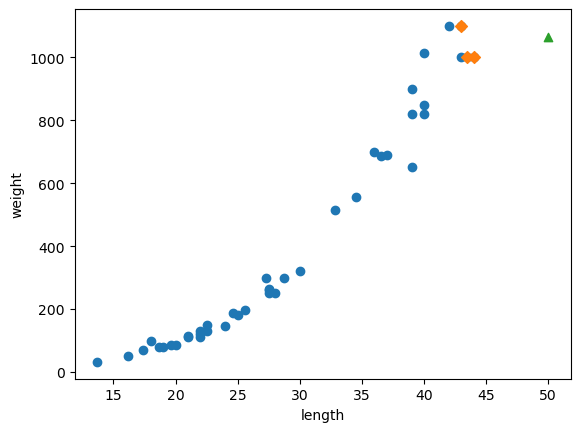

In [39]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

# 50cm 길이 농어의 최근접 이웃
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1066, marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [40]:
# 선형 회귀

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [46]:
# 훈련

lr.fit(train_input, train_target)

LinearRegression()

In [47]:
# 예측

In [51]:
lr.predict([[50], [100]])

array([1223.63582633, 3150.5862872 ])

In [52]:
# 최적의 기울기 - 계수, 가중치 = Lr.coef_
# 최적의 절편 - Lr.interecept_

In [54]:
print(lr.coef_, lr.intercept_)
# y = 38.5x - 730.31
# 즉 x = 길이, y = 무게

[38.53900922] -703.3146345421549


In [55]:
# matplotlib - plot
# 직선, 곡선 그래프

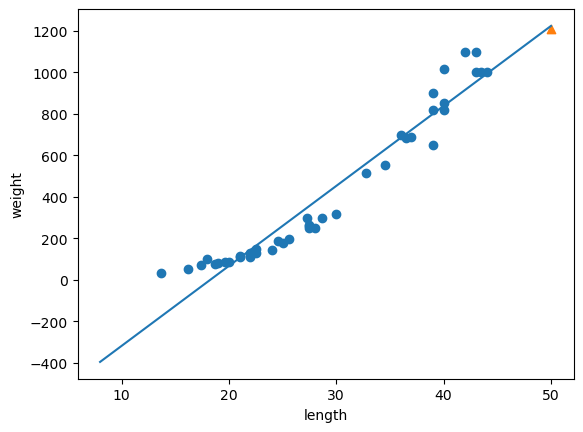

In [68]:
# 훈련 세트
plt.scatter(train_input, train_target)

# x 좌표 = 8, 테스트 하고싶은 값 = 50
plt.plot([8, 50], [8 * lr.coef_[0] + lr.intercept_, 50 * lr.coef_[0] + lr.intercept_])
plt.scatter(50, 1210, marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [69]:
# 훈련 세트 결정 계수
print(lr.score(train_input, train_target))

# 테스트 세트 결정 계수
print(lr.score(test_input, test_target))

0.9388065930175745
0.7989392332788854


In [70]:
# 다항 회귀 - 2차원 방정식
# y = ax^2 + bx + c
# a, b = 최적의 가중치(기울기, 계수), c = 절편
# x = 길이, y = 무게                                                  

In [73]:
train_poly = np.column_stack((train_input ** 2, train_input))

test_poly = np.column_stack((test_input ** 2, test_input))

In [75]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [79]:
# 2차 방정식으로 훈련

In [78]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [82]:
lr.predict([[50 ** 2, 50]])

array([1571.26071209])

In [87]:
print(lr.coef_, lr.intercept_)

# [a, b] c

[  1.09993977 -27.63779412] 203.300985681479


In [88]:
# 곡선 - 연속된 x, y 좌표를 제공해야 함

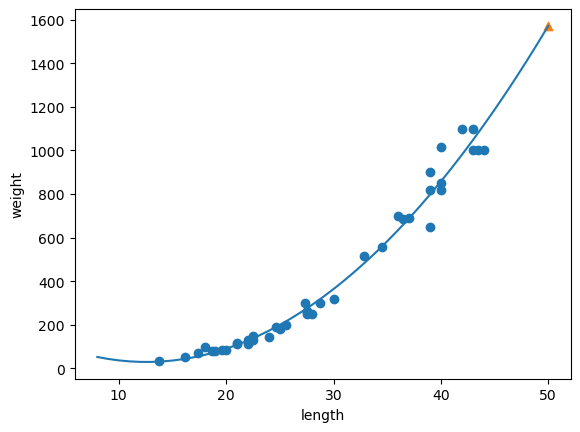

In [91]:
# x 좌표 = 길이(8 ~ 51)

point = np.arange(8, 51)

# 훈련 세트 산포도
plt.scatter(train_input, train_target)

plt.scatter(50, 1571, marker='^')

# 곡선 그래프
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [92]:
# 결정 계수

In [93]:
# 훈련 세트 결정 계수
print(lr.score(train_poly, train_target))

# 테스트 세트 결정 계수
print(lr.score(test_poly, test_target))

0.9784042953002939
0.9361521308209179
